In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import keras.backend as K
from keras.layers import Input, Activation, Dense, BatchNormalization, Dropout
from keras.callbacks import History
history = History()
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


# Data Acquisition

In [2]:
# Data Acuisition
x_train=pd.read_csv("mnist_train.csv")
x_test=pd.read_csv("mnist_test.csv")

In [3]:
# Data Visulization
x_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data Preprocessing

y_train = x_train.iloc[:,0].values
x_train = x_train.drop(["label"],axis=1)
y_test = x_test.iloc[:,1].values
x_test = x_test.drop(["label"],axis=1)

In [5]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
#x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [7]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
#print(f'x_val shape = {x_val.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Model

In [8]:
input_data = Input(shape=(784,))#0
encoded = Dense(128, activation='relu')(input_data)#1
encoded = BatchNormalization()(encoded)#2
encoded = Dense(64, activation='relu')(encoded)#3
encoded = BatchNormalization()(encoded)#4
encoded = Dense(32, activation='relu')(encoded)#5
encoded = BatchNormalization()(encoded)#6

decoded = Dense(64, activation='sigmoid')(encoded)#7
decoded = BatchNormalization()(decoded)#8
decoded = Dense(128, activation='sigmoid')(decoded)#9
decoded = BatchNormalization()(decoded)#10
decoded = Dense(784, activation='sigmoid')(decoded)#11

stackedautoencoder = Model(input_data, decoded)
stackedautoencoder.compile(loss='binary_crossentropy', optimizer = 'adadelta')

stackedencoder = Model(input_data, encoded)
stackedencoder.compile(loss='binary_crossentropy', optimizer = 'adadelta')

stackedautoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128 

In [9]:
#Autoencoder1
input_data1 = Input(shape=(784,))#0
encoded1 = Dense(128, activation='relu')(input_data1)#1
encoded1 = BatchNormalization()(encoded1)#2
decoded1 = Dense(784, activation='sigmoid')(encoded1)#11

autoencoder1 = Model(input_data1, decoded1)
encoder1 = Model(input_data1, encoded1)

#Autoencoder2
input_data2 = Input(shape=(128,))
encoded2 = Dense(64, activation='relu')(input_data2)#3
encoded2 = BatchNormalization()(encoded2)#4
decoded2 = Dense(128, activation='sigmoid')(encoded2)#9
decoded2 = BatchNormalization()(decoded2)#10

autoencoder2 = Model(input_data2, decoded2)
encoder2 = Model(input_data2, encoded2)

#Autoencoder3
input_data3 = Input(shape=(64,))
encoded3 = Dense(32, activation='relu')(input_data3)#5
encoded3 = BatchNormalization()(encoded3)#6
decoded3 = Dense(64, activation= 'sigmoid')(encoded3)#7
decoded3 = BatchNormalization()(decoded3)#8

autoencoder3 = Model(input_data3, decoded3)
encoder3 = Model(input_data3, encoded3)

In [10]:
autoencoder1.compile(loss='binary_crossentropy', optimizer = 'adadelta')
autoencoder2.compile(loss='binary_crossentropy', optimizer = 'adadelta')
autoencoder3.compile(loss='binary_crossentropy', optimizer = 'adadelta')

encoder1.compile(loss='binary_crossentropy', optimizer = 'adadelta')
encoder2.compile(loss='binary_crossentropy', optimizer = 'adadelta')
encoder3.compile(loss='binary_crossentropy', optimizer = 'adadelta')

# Fit Data

In [11]:
history1 = autoencoder1.fit(x_train, x_train, epochs=200, batch_size = 512, validation_split = 0.25, shuffle = True)

Train on 45000 samples, validate on 15000 samples
Epoch 1/200
45000/45000 [==============================] - 5s 118us/step - loss: 0.6891 - val_loss: 0.6659
Epoch 2/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.6114 - val_loss: 0.5751
Epoch 3/200
45000/45000 [==============================] - 3s 73us/step - loss: 0.4530 - val_loss: 0.3515
Epoch 4/200
45000/45000 [==============================] - 3s 74us/step - loss: 0.2861 - val_loss: 0.2415
Epoch 5/200
45000/45000 [==============================] - 3s 72us/step - loss: 0.2219 - val_loss: 0.2074
Epoch 6/200
45000/45000 [==============================] - 3s 73us/step - loss: 0.1981 - val_loss: 0.1907
Epoch 7/200
45000/45000 [==============================] - 3s 75us/step - loss: 0.1846 - val_loss: 0.1797
Epoch 8/200
45000/45000 [==============================] - 3s 75us/step - loss: 0.1752 - val_loss: 0.1717
Epoch 9/200
45000/45000 [==============================] - 3s 78us/step - loss: 0.1677 - val_loss: 0.

45000/45000 [==============================] - 3s 69us/step - loss: 0.0788 - val_loss: 0.0793
Epoch 78/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0786 - val_loss: 0.0791
Epoch 79/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0784 - val_loss: 0.0789
Epoch 80/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0782 - val_loss: 0.0787
Epoch 81/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0780 - val_loss: 0.0785
Epoch 82/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0779 - val_loss: 0.0784
Epoch 83/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0777 - val_loss: 0.0782
Epoch 84/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0775 - val_loss: 0.0780
Epoch 85/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0773 - val_loss: 0.0779
Epoch 86/200
45000/45000 [========================

45000/45000 [==============================] - 3s 69us/step - loss: 0.0716 - val_loss: 0.0722
Epoch 154/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0716 - val_loss: 0.0721
Epoch 155/200
45000/45000 [==============================] - 3s 70us/step - loss: 0.0715 - val_loss: 0.0721
Epoch 156/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0715 - val_loss: 0.0721
Epoch 157/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0715 - val_loss: 0.0720
Epoch 158/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0714 - val_loss: 0.0720
Epoch 159/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0714 - val_loss: 0.0719
Epoch 160/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0713 - val_loss: 0.0719
Epoch 161/200
45000/45000 [==============================] - 3s 69us/step - loss: 0.0713 - val_loss: 0.0719
Epoch 162/200
45000/45000 [===============

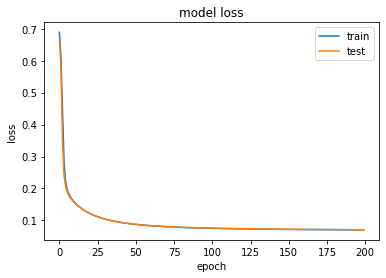

In [12]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackedae1_model_loss.png')
plt.show()

In [13]:
first_layer_code = encoder1.predict(x_train)
print(first_layer_code.shape)

(60000, 128)


In [14]:
history2 = autoencoder2.fit(first_layer_code, first_layer_code,epochs = 200, batch_size = 512, validation_split = 0.25, shuffle = True)

Train on 45000 samples, validate on 15000 samples
Epoch 1/200
45000/45000 [==============================] - 1s 22us/step - loss: -0.9503 - val_loss: -2.2056
Epoch 2/200
45000/45000 [==============================] - 1s 12us/step - loss: -3.6233 - val_loss: -4.8128
Epoch 3/200
45000/45000 [==============================] - 1s 11us/step - loss: -4.9734 - val_loss: -6.2388
Epoch 4/200
45000/45000 [==============================] - 1s 13us/step - loss: -5.9822 - val_loss: -7.0066
Epoch 5/200
45000/45000 [==============================] - 1s 13us/step - loss: -6.9016 - val_loss: -7.6046
Epoch 6/200
45000/45000 [==============================] - 1s 12us/step - loss: -7.7508 - val_loss: -8.1429
Epoch 7/200
45000/45000 [==============================] - 1s 12us/step - loss: -8.4541 - val_loss: -8.7618
Epoch 8/200
45000/45000 [==============================] - 1s 12us/step - loss: -9.1410 - val_loss: -9.4078
Epoch 9/200
45000/45000 [==============================] - 1s 13us/step - loss: -9.801

45000/45000 [==============================] - 1s 16us/step - loss: -20.8229 - val_loss: -20.7982
Epoch 75/200
45000/45000 [==============================] - 1s 17us/step - loss: -20.8588 - val_loss: -20.8145
Epoch 76/200
45000/45000 [==============================] - 1s 14us/step - loss: -20.8844 - val_loss: -20.8396
Epoch 77/200
45000/45000 [==============================] - 1s 18us/step - loss: -20.9143 - val_loss: -20.8817
Epoch 78/200
45000/45000 [==============================] - 1s 15us/step - loss: -20.9464 - val_loss: -20.9039
Epoch 79/200
45000/45000 [==============================] - 1s 18us/step - loss: -20.9714 - val_loss: -20.9389
Epoch 80/200
45000/45000 [==============================] - 1s 18us/step - loss: -20.9974 - val_loss: -20.9598
Epoch 81/200
45000/45000 [==============================] - 1s 17us/step - loss: -21.0236 - val_loss: -20.9935
Epoch 82/200
45000/45000 [==============================] - 1s 18us/step - loss: -21.0522 - val_loss: -21.0041
Epoch 83/200
4

45000/45000 [==============================] - 1s 14us/step - loss: -21.7588 - val_loss: -21.7241
Epoch 148/200
45000/45000 [==============================] - 1s 14us/step - loss: -21.7645 - val_loss: -21.7184
Epoch 149/200
45000/45000 [==============================] - 1s 13us/step - loss: -21.7644 - val_loss: -21.7316
Epoch 150/200
45000/45000 [==============================] - 1s 14us/step - loss: -21.7677 - val_loss: -21.7410
Epoch 151/200
45000/45000 [==============================] - 1s 14us/step - loss: -21.7799 - val_loss: -21.7507
Epoch 152/200
45000/45000 [==============================] - 1s 14us/step - loss: -21.7865 - val_loss: -21.7489
Epoch 153/200
45000/45000 [==============================] - 1s 13us/step - loss: -21.7877 - val_loss: -21.7481
Epoch 154/200
45000/45000 [==============================] - 1s 13us/step - loss: -21.7897 - val_loss: -21.7481
Epoch 155/200
45000/45000 [==============================] - 1s 15us/step - loss: -21.7938 - val_loss: -21.7585
Epoch 

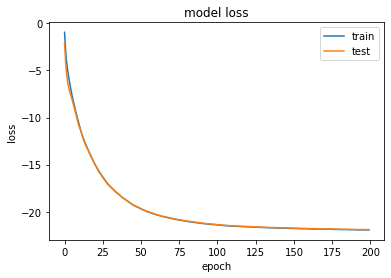

In [15]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackedae2_loss.png')
plt.show()

In [16]:
second_layer_code = encoder2.predict(first_layer_code)
print(second_layer_code.shape)

(60000, 64)


In [17]:
history3 = autoencoder3.fit(second_layer_code, second_layer_code, epochs = 200, batch_size = 512,validation_split = 0.30,shuffle = True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/200
42000/42000 [==============================] - 1s 23us/step - loss: 0.5721 - val_loss: -0.7347
Epoch 2/200
42000/42000 [==============================] - 0s 8us/step - loss: -0.4187 - val_loss: -2.0406
Epoch 3/200
42000/42000 [==============================] - 0s 9us/step - loss: -0.9324 - val_loss: -2.4585
Epoch 4/200
42000/42000 [==============================] - 0s 9us/step - loss: -1.3672 - val_loss: -2.4647
Epoch 5/200
42000/42000 [==============================] - 0s 8us/step - loss: -1.7654 - val_loss: -2.4613
Epoch 6/200
42000/42000 [==============================] - 0s 9us/step - loss: -2.1669 - val_loss: -2.5695
Epoch 7/200
42000/42000 [==============================] - 0s 9us/step - loss: -2.5355 - val_loss: -2.7963
Epoch 8/200
42000/42000 [==============================] - 0s 8us/step - loss: -2.8815 - val_loss: -3.0323
Epoch 9/200
42000/42000 [==============================] - 0s 8us/step - loss: -3.1865 - val_l

42000/42000 [==============================] - 0s 10us/step - loss: -7.1014 - val_loss: -7.0651
Epoch 77/200
42000/42000 [==============================] - 0s 9us/step - loss: -7.1153 - val_loss: -7.0761
Epoch 78/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.1302 - val_loss: -7.0939
Epoch 79/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.1460 - val_loss: -7.1085
Epoch 80/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.1614 - val_loss: -7.1237
Epoch 81/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.1758 - val_loss: -7.1373
Epoch 82/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.1903 - val_loss: -7.1508
Epoch 83/200
42000/42000 [==============================] - 0s 9us/step - loss: -7.2018 - val_loss: -7.1654
Epoch 84/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.2147 - val_loss: -7.1796
Epoch 85/200
42000/42000 [==============

42000/42000 [==============================] - 0s 9us/step - loss: -7.6479 - val_loss: -7.6084
Epoch 152/200
42000/42000 [==============================] - 0s 9us/step - loss: -7.6533 - val_loss: -7.6120
Epoch 153/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6562 - val_loss: -7.6164
Epoch 154/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6613 - val_loss: -7.6189
Epoch 155/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6647 - val_loss: -7.6222
Epoch 156/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6678 - val_loss: -7.6248
Epoch 157/200
42000/42000 [==============================] - 0s 9us/step - loss: -7.6694 - val_loss: -7.6267
Epoch 158/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6747 - val_loss: -7.6313
Epoch 159/200
42000/42000 [==============================] - 0s 8us/step - loss: -7.6768 - val_loss: -7.6338
Epoch 160/200
42000/42000 [======

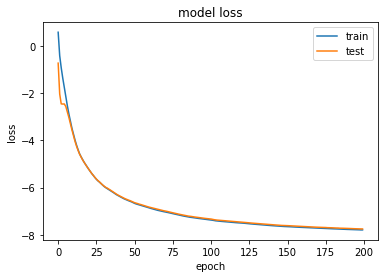

In [18]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackedae3_model_loss.png')
plt.show()

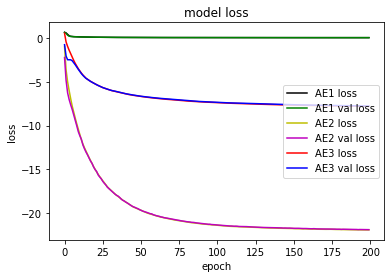

In [38]:
# AE: lot training loss and validation split loss over the epochs
plt.plot(history1.history['loss'],'k',label='AE1 loss')
plt.plot(history1.history['val_loss'],'g',label='AE1 val loss')
plt.plot(history2.history['loss'],'y',label='AE2 loss')
plt.plot(history2.history['val_loss'],'m',label='AE2 val loss')
plt.plot(history3.history['loss'],'r',label='AE3 loss')
plt.plot(history3.history['val_loss'],'b',label='AE3 val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.savefig('stackAEwhole_model_loss.png')
plt.show()

In [19]:
#Stacked autoencoder
stackedautoencoder.layers[1].set_weights(autoencoder1.layers[1].get_weights()) # first dense layer
stackedautoencoder.layers[2].set_weights(autoencoder1.layers[2].get_weights())
stackedautoencoder.layers[3].set_weights(autoencoder2.layers[1].get_weights())
stackedautoencoder.layers[4].set_weights(autoencoder2.layers[2].get_weights())
stackedautoencoder.layers[5].set_weights(autoencoder3.layers[1].get_weights())
stackedautoencoder.layers[6].set_weights(autoencoder3.layers[2].get_weights())
stackedautoencoder.layers[7].set_weights(autoencoder3.layers[3].get_weights())
stackedautoencoder.layers[8].set_weights(autoencoder3.layers[4].get_weights())
stackedautoencoder.layers[9].set_weights(autoencoder2.layers[3].get_weights())
stackedautoencoder.layers[10].set_weights(autoencoder2.layers[4].get_weights())
stackedautoencoder.layers[11].set_weights(autoencoder1.layers[3].get_weights())

In [20]:
reconstructed_imgs = stackedautoencoder.predict(x_test)
reconstructed_imgs.shape
#reconstructed_imgs = autoencoder.predict(x_test)
#encoded_imgs = encoder.predict(x_test)

(10000, 784)

In [21]:
evaluation = stackedautoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

10000/10000 [==============================] - 1s 58us/step
Loss: 0.1514792359828949


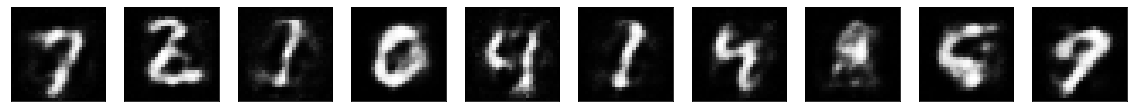

In [25]:
# Ploting the original input vs reconstructed output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('StackedAEoutput')
plt.show()

In [23]:
#encodermodel
stackedencoder.layers[1].set_weights(autoencoder1.layers[1].get_weights()) # first dense layer
stackedencoder.layers[2].set_weights(autoencoder1.layers[2].get_weights())
stackedencoder.layers[3].set_weights(autoencoder2.layers[1].get_weights())
stackedencoder.layers[4].set_weights(autoencoder2.layers[2].get_weights())
stackedencoder.layers[5].set_weights(autoencoder3.layers[1].get_weights())
stackedencoder.layers[6].set_weights(autoencoder3.layers[2].get_weights())

latent_vector_train = stackedencoder.predict(x_train)
latent_vector = stackedencoder.predict(x_test)

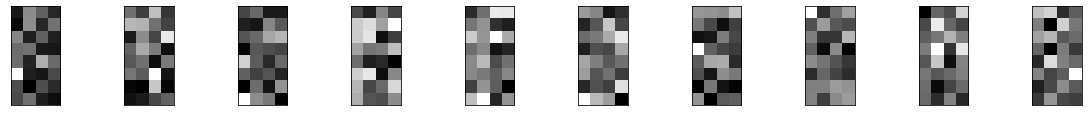

In [24]:
# Ploting the encoded output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(latent_vector[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('StackedAElatentoutput')
plt.show()